# COVID-19 and US Intrastate Travels

# Overview

The goal for this project is to identify whether intrastate travel has any affect on the increase of COVID rates per state. We will clean and merge two datasets, one containing the daily COVID rates per state and the other summarizing intrastate travel per state. We intend to focus on daily positive increases as a function of intrastate travel, and will explore the data using both visual and predictive analysis. In despite of analyzing the data from multiple angles, our models predict that there is no direct correlation between the spread of COVID-19 and the number of trips within a state.


**Note**: Please download the HTML notebook file (or run this file) on your local machine to see the visualizations properly.

# Names

- Taylor Han
- Luis Navarro
- Mitchell Gault
- Seoyoung Lim

# Research Question

"*Can the new daily COVID-19 cases per state be explained by the number and distance of travel in the US?*"

## Background and Prior Work

Between August 2nd and September 5th 2020, the CDC reported that the weekly COVID-19 cases within individuals aged 18 and 22 increased to 55% across the nation [1]. This has resulted in warnings issued to Americans from international travel, pointing to the enhancement of safety and health conditions in certain states (cdc.gov). The CDC has continually informed the public on how traveling potentially increases the possibility of being infected and spreading the coronavirus and suggests that staying at home is the best preventive measure. However, many individuals have not yet taken such measures of spreading the virus seriously and still travel around [2]. Therefore, to adequately create public awareness and offer scientific analysis on the necessity of keeping of maintaining social distance, we demonstrate the correlation between the spread of COVID-19 and traveling mathematically through data algorithms [3].


Various studies have been carried out to offer the algorithms for different viruses’ widespread presence techniques or predict the disease's spread rate. For example, WU and Leung [4] established the framework used to indicate the possible local and international coronavirus spread.


In this detailed data analysis, the correlation between traveling between cities with new confirmed cases of COVID-19 in United States is demonstrated. The impact of air and urban traffic involving the passenger population and the number of flights, the new COVID-19 cases have been probed. This data's significance is that irrespective of the deficiency of comprehensive information concerning the data figure of travels among Americans, a relationship between the accumulative number of trips and the spread of COVID-19 cases can be established.


References (include links):
- 1) CDC government, September 29, 2020, https://www.cdc.gov/mmwr/volumes/69/wr/mm6939e4.htm
- 2) Wikipedia Retrieved October 23, 2020, from https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdowns
- 3) Zhou P YX, Wang XG, Hu B, Zhang L, Zhang W, et al. A pneumonia outbreak associated with a new coronavirus of probable bat origin. Nature, https://pubmed.ncbi.nlm.nih.gov/32015507/2020.
- 4) Wu et al., 2020b J.T. Wu, K. Leung, G.M. Leung Nowcasting and forecasting the potential domestic and international spread of the 2019-nCoV outbreak originating in Wuhan, China, https://www.sciencedirect.com/science/article/pii/S0009250920304504#bb0170

# Hypothesis


Our primary hypothesis is that we predict that the number of new daily COVID-19 cases is positively correlated with the number travels and hope to illustrate that less travel results in less cases. Along with the number of travels, we also predict that the distance of travel is positively correlated with the number of new daily COVID-19 cases, though weaker than to the total number of travels in that state.

We believe in these such ways as COVID-19 is a respiratory disease and it is known to be transmitted mainly through respiratory droplets produced when an infected person coughs, sneezes, or talks. These droplets can land in the mouths or noses of people who are nearby or possibly be inhaled into the lungs. With that in mind, we hypotheisze that more travels and longer trips lead to a higher chance of unintentional COVID-19 spread.

# Datasets

Our first dataset is "Trips by Distance" from the US Department of Transportation, Bureau of Transportation Statistics. The dataset contains a number of trips separated by distance (1-3, 3-5, 5-10, etc) and by county/state, starting on January 1st, 2019. But, since COVID-19 dataset starts from 1/22/2020, we will use only a partial date dataset (1/22/2020 - 10/10/2020).


- Number of Observations: 2.07M
- Number of features: 19 (we are only describing relevant columns below)
    - Level - Indicates national, State, or Country level metric
    - Date - Reporting date
    - State FIPS - Two digits FIPS state code
    - State Postal Code - State postal code 
    - Population Staying at home - Number of residents staying at home.Ex) Person who make no trips with a trip end more than one mile away from home.
    - Number of trips = Total number of trips, regardless of the distance
    - Number of Trips < 1 - Total number of trips that is less than 1 mile
    - Number of Trips 1-3 - Total number of trips that is between 1 and 3 miles
    - Number of Trips 3-5 - Total number of trips that is between 3 and 5 miles
    - Number of Trips 5-10 - Total number of trips that is between 5 and 10 miles
    - Number of Trips 10-25 - Total number of trips that is between 10 and 25 miles
    - Number of Trips 25-50 - Total number of trips that is between 25 and 50 miles
    - Number of Trips 50-100 - Total number of trips that is between 50 and 100 miles
    - Number of Trips 100-250 - Total number of trips that is between 100 and 250 miles
    - Number of Trips 250-500 - Total number of trips that is between 250 and 500 miles
    - Number of Trips >= 500 - Total number of trips that is longer than 500 miles
   
Trips are defined as movements that include a stay of longer than 10minutes at an anonymized local away from home. Trips capture travel by all modes of transportation including driving, rail, and air. This dataset tracks mobile data geolocation as an indication for movement. It doesn't specify between modes of transportation, however we consider this more significant as it captures motion otherwise uncollectable. 


Our download of this dataset is October 10th, 2020.

https://data.bts.gov/Research-and-Statistics/Trips-by-Distance/w96p-f2qv

Our second data comes from Kaggle, us_states_covid19_daily.csv. This dataset shows the number of daily COVID-19 cases per day by US state.


- Number of Observations: 11.6K
- Number of features: 54 (we are only describing relevant columns below)
    - date - Reporting date
    - state - State in US that has cases of COVID-19
    - positiveIncrease - Number of COVID-19 cases that day
    - positive - Total accumulated number of COVID-19 cases


https://www.kaggle.com/sudalairajkumar/covid19-in-usa?select=us_covid19_daily.csv

Our download of both datasets is October 10th, 2020.

# Setup

In [1]:
#importing standard libraries
import pandas as pd
import numpy as np
import requests
from io import StringIO

#basic visualization package
import matplotlib.pyplot as plt

#%matplotlib inline
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


#Interactive Visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# For predictive analysis
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

First we will focus on cleaning the Trips by distance dataset. While it contains multiple levels (county, state, national), we are only interested in the state level. Then we will merge it with the Daily COVID dataset and merge them together. Lastly, we will break the datasets up per state for easier manipulation and to minimize one-hot encoding later.

In [2]:
#import datasets
df_trips_by_distance = pd.read_csv("https://www.dropbox.com/s/970urh3ye9g728h/Trips_by_Distance.csv?dl=1")
df_COVID19_state = pd.read_csv("https://www.dropbox.com/s/6rv32rseh84k1pi/us_states_covid19_daily.csv?dl=1")

The first case of COVID-19 in USA was on 1/20/2020, but since our other dataset starts from 1/22/2020, we will use that date instead.

In [3]:
#new dataframe called df_trips_by_distance_state from df_trips_by_distance, only looking at state level travels
df_trips_by_distance_state = df_trips_by_distance.loc[(df_trips_by_distance['Level'] == "State") & (df_trips_by_distance['Date'] >= "2020/01/22")]
df_trips_by_distance_state = df_trips_by_distance_state.drop(["Level", "State FIPS", "County FIPS", "County Name"], 1)

#convert the date column to integer to match the COVID dataset
df_trips_by_distance_state["Date"] = pd.to_datetime(df_trips_by_distance_state["Date"]).dt.strftime("%Y%m%d").astype(int)

#reset index
df_trips_by_distance_state.reset_index(inplace = True)

#rename columns
df_trips_by_distance_state.rename(columns = {"State Postal Code": "State"}, inplace = True)
df_trips_by_distance_state.rename(columns = {"Number of Trips": "nTrips"}, inplace = True)

We decided that combining the 10 "number of trips" columns into 3 groups will be more efficient for our analysis. The first group summons the number of trips ranging from less than 1 mile to 25 miles (inclusive). The second group summons the number of trips ranging from 25 miles (exclusive) to 250 miles, and the last group from 250 miles (exclusive) to 500 miles.

In [4]:
#combine number of trips into groups (1-25, 25-250, 250-500)
#group1
df_trips_by_distance_state["Number_of_Trips_1_25"] = df_trips_by_distance_state["Number of Trips <1"] + df_trips_by_distance_state["Number of Trips 1-3"] + df_trips_by_distance_state["Number of Trips 3-5"] + df_trips_by_distance_state["Number of Trips 5-10"]
+ df_trips_by_distance_state["Number of Trips 10-25"]

#group2
df_trips_by_distance_state["Number_of_Trips_25_250"] = df_trips_by_distance_state["Number of Trips 50-100"] + df_trips_by_distance_state["Number of Trips 100-250"]

#group3
df_trips_by_distance_state["Number_of_Trips_250_"] = df_trips_by_distance_state["Number of Trips 250-500"] + df_trips_by_distance_state["Number of Trips >=500"]

df_trips_by_distance_state

,index,Date,State,Population Staying at Home,Population Not Staying at Home,nTrips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Number_of_Trips_1_25,Number_of_Trips_25_250,Number_of_Trips_250_
0,1245449,20200122,AL,807735.0,4080136.0,16164304.0,3480408.0,3874504.0,2156843.0,2708360.0,2596986.0,902492.0,309079.0,107087.0,23934.0,4611.0,12220115.0,416166.0,28545.0
1,1245450,20200122,AK,159711.0,577727.0,2949908.0,874686.0,800754.0,403581.0,411898.0,308836.0,111693.0,25079.0,8213.0,1378.0,3790.0,2490919.0,33292.0,5168.0
2,1245451,20200122,AZ,1352937.0,5818709.0,25236411.0,6687167.0,6068252.0,3031583.0,3790445.0,3989392.0,1171535.0,305405.0,147048.0,27142.0,18442.0,19577447.0,452453.0,45584.0
3,1245452,20200122,AR,544871.0,2468954.0,9272794.0,2130987.0,2415655.0,1184837.0,1429620.0,1343605.0,490685.0,181059.0,75534.0,17561.0,3251.0,7161099.0,256593.0,20812.0
4,1245453,20200122,CA,7227607.0,32329438.0,145519407.0,40323676.0,36885229.0,16871766.0,20809450.0,20492587.0,7281951.0,2148748.0,533057.0,114312.0,58631.0,114890121.0,2681805.0,172943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13408,2072894,20201010,DE,253912.0,713259.0,2754854.0,591440.0,670914.0,362842.0,457957.0,410734.0,170809.0,71527.0,17162.0,1034.0,435.0,2083153.0,88689.0,1469.0
13409,2072895,20201010,ME,372027.0,966377.0,3517685.0,639075.0,825972.0,433764.0,568335.0,647161.0,258947.0,108178.0,31313.0,3439.0,1501.0,2467146.0,139491.0,4940.0
13410,2072896,20201010,OK,1056873.0,2886206.0,10486457.0,2263637.0,2643666.0,1252829.0,1594162.0,1686304.0,611996.0,304401.0,112079.0,15137.0,2246.0,7754294.0,416480.0,17383.0
13411,2072897,20201010,WI,1534312.0,4279256.0,16821730.0,3598155.0,4026875.0,2056805.0,2605089.0,2695790.0,1111973.0,508067.0,190840.0,23237.0,4899.0,12286924.0,698907.0,28136.0


In [5]:
# Check for Null values
df_trips_by_distance_state.isnull().sum()

index                             0
Date                              0
State                             0
Population Staying at Home        0
Population Not Staying at Home    0
nTrips                            0
Number of Trips <1                0
Number of Trips 1-3               0
Number of Trips 3-5               0
Number of Trips 5-10              0
Number of Trips 10-25             0
Number of Trips 25-50             0
Number of Trips 50-100            0
Number of Trips 100-250           0
Number of Trips 250-500           0
Number of Trips >=500             0
Number_of_Trips_1_25              0
Number_of_Trips_25_250            0
Number_of_Trips_250_              0
dtype: int64

Next, we want to prepare the COVID-19 dataset.

In [6]:
#The top row is the latest data, so we need to shift the index and reset it such that Jan 22, 2020 is the new first row
df_COVID19_state = df_COVID19_state.iloc[::-1]
df_COVID19_state.reset_index(inplace = True)

#Extract variables of interest
df_COVID19_state_wrangled = df_COVID19_state[["date", "state", "positive", "positiveIncrease"]]

#view df_COVID19_state_wrangled
df_COVID19_state_wrangled

,date,state,positive,positiveIncrease
0,20200122,WA,0.0,0
1,20200122,MA,NaN,0
2,20200123,WA,0.0,0
3,20200123,MA,NaN,0
4,20200124,WA,0.0,0
...,...,...,...,...
11629,20200927,AZ,217237.0,411
11630,20200927,AS,0.0,0
11631,20200927,AR,81242.0,487
11632,20200927,AL,152321.0,730


In [7]:
# Check for Null values
df_COVID19_state_wrangled.isnull().sum()

date                 0
state                0
positive            99
positiveIncrease     0
dtype: int64

In [8]:
# After manual exploration, these null values occur when there are zero positive cases so we will replace them with zeroes
df_COVID19_state_wrangled['positive'] = df_COVID19_state_wrangled['positive'].fillna(0)

C:\Users\PC\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
#merge the two datasets
df_combined = pd.merge(left = df_trips_by_distance_state, right=df_COVID19_state_wrangled, how='left', left_on=["Date","State"], right_on=["date","state"])

#Create region mapping for four regions
regions = {'AK': 'W','AL': 'S', 'AR': 'S', 'AZ': 'W', 'CA': 'W',
    'CO': 'W', 'CT': 'N', 'DC': 'N', 'DE': 'N', 'FL': 'S', 'GA': 'S', 'HI': 'W', 'IA': 'M',
    'ID': 'W', 'IL': 'M', 'IN': 'M', 'KS': 'M', 'KY': 'S', 'LA': 'S', 'MA': 'N', 'MD': 'N',
    'ME': 'N', 'MI': 'W', 'MN': 'M', 'MO': 'M', 'MS': 'S', 'MT': 'W', 'NC': 'S', 'ND': 'M',
    'NE': 'W', 'NH': 'N', 'NJ': 'N', 'NM': 'W', 'NV': 'W', 'NY': 'N', 'OH': 'M', 'OK': 'S',
    'OR': 'W', 'PA': 'N', 'RI': 'N', 'SC': 'S', 'SD': 'M', 'TN': 'S', 'TX': 'S', 'UT': 'W',
    'VA': 'S', 'VT': 'N', 'WA': 'W', 'WI': 'M', 'WV': 'S', 'WY': 'W' }

df_combined['region'] = df_combined['State'].map(regions)

#drop repeated columns
df_combined = df_combined.drop(["date", "state"], 1)

#Get ratio of population not staying home
df_combined["Ratio"] = df_combined["Population Not Staying at Home"]/ (df_combined["Population Staying at Home"]+df_combined["Population Not Staying at Home"])
    

df_combined

,index,Date,State,Population Staying at Home,Population Not Staying at Home,nTrips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,...,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Number_of_Trips_1_25,Number_of_Trips_25_250,Number_of_Trips_250_,positive,positiveIncrease,region,Ratio
0,1245449,20200122,AL,807735.0,4080136.0,16164304.0,3480408.0,3874504.0,2156843.0,2708360.0,...,107087.0,23934.0,4611.0,12220115.0,416166.0,28545.0,NaN,NaN,S,0.834747
1,1245450,20200122,AK,159711.0,577727.0,2949908.0,874686.0,800754.0,403581.0,411898.0,...,8213.0,1378.0,3790.0,2490919.0,33292.0,5168.0,NaN,NaN,W,0.783425
2,1245451,20200122,AZ,1352937.0,5818709.0,25236411.0,6687167.0,6068252.0,3031583.0,3790445.0,...,147048.0,27142.0,18442.0,19577447.0,452453.0,45584.0,NaN,NaN,W,0.811349
3,1245452,20200122,AR,544871.0,2468954.0,9272794.0,2130987.0,2415655.0,1184837.0,1429620.0,...,75534.0,17561.0,3251.0,7161099.0,256593.0,20812.0,NaN,NaN,S,0.819209
4,1245453,20200122,CA,7227607.0,32329438.0,145519407.0,40323676.0,36885229.0,16871766.0,20809450.0,...,533057.0,114312.0,58631.0,114890121.0,2681805.0,172943.0,NaN,NaN,W,0.817286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13408,2072894,20201010,DE,253912.0,713259.0,2754854.0,591440.0,670914.0,362842.0,457957.0,...,17162.0,1034.0,435.0,2083153.0,88689.0,1469.0,NaN,NaN,N,0.737469
13409,2072895,20201010,ME,372027.0,966377.0,3517685.0,639075.0,825972.0,433764.0,568335.0,...,31313.0,3439.0,1501.0,2467146.0,139491.0,4940.0,NaN,NaN,N,0.722037
13410,2072896,20201010,OK,1056873.0,2886206.0,10486457.0,2263637.0,2643666.0,1252829.0,1594162.0,...,112079.0,15137.0,2246.0,7754294.0,416480.0,17383.0,NaN,NaN,S,0.731968
13411,2072897,20201010,WI,1534312.0,4279256.0,16821730.0,3598155.0,4026875.0,2056805.0,2605089.0,...,190840.0,23237.0,4899.0,12286924.0,698907.0,28136.0,NaN,NaN,M,0.736081


In [10]:
#Again, we have null values for when the Trip by Distance dataset has more observations than the COVID19 dataset
#Since we confirmed there were no unexpected null values before the merge, we can replace the values with 0
df_combined = df_combined.fillna(0)

In [11]:
#save combined dataset for future use
df_combined.to_csv('combined.csv')

In [12]:
#Next we will break up the dataset per state
state_list = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

for state in state_list:
    #create new dataset for each state
    exec(f'df_combined_{state} = df_combined.loc[(df_combined["State"] == state)]')
    
    #Convert combined date from integer to datetime for plotting
    exec(f'df_combined_{state}["Date"] =  pd.to_datetime(df_combined_{state}["Date"], format="%Y%m%d")')
    
#Convert combined to datetime since we no longer need to worry about the merge
df_combined['Date'] = pd.to_datetime(df_combined['Date'], format='%Y%m%d')


C:\Users\PC\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Summary of Data Cleaning
Both datasets were standardized in their values and date formatting. We had an easy time merging and extracting only what we were interrested in for analysis.

### Pre-processing
We didn't have to do any pre-processing to our datasets as both csv files were collected by their respective source.

### Columns Dropped
From the Trips By Distance dataset, we dropped: "Level", "State FIPS", "County FIPS", and "County Name".

From the Daily COVID 19 dataset, we dropped: 'index', 'negative', 'pending', 'totalTestResults', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death', 'hospitalized', 'dateChecked', 'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'totalTestEncountersViral', 'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody', 'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen', 'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'negativeIncrease', 'total', 'totalTestResultsSource', 'totalTestResultsIncrease', 'posNeg', 'deathIncrease', 'hospitalizedIncrease', 'hash', 'commercialScore', 'negativeRegularScore', 'negativeScore', 'positiveScore', 'score', and 'grade'

### Columns Merged
We merged several of the Trips By Distance dataset into four groupings for analysis based on distance range.

### Columns Added
We added state regions which will later help with plotting. We also added ratio, which calculates proportion of population which is not staying at home.

### Rows Dropped 
We didn't drop any rows due to null values. Instead, we converted them to zeroes as they only occured in states before any COVID19 cases were reported.

### Other Information Dropped
From the Trips by Distance dataset, we dropped 2059493 rows as they were either at the county or national level since we only cared about the state level and interstate travel. We note there will be some loss in granularity of our data, but our Trips by Distance dataset doesn't describe the county level so the additional data is irrelevant.


# Descriptive Analysis

In [13]:
#Get total combined shape
print("Number of observations: ", df_combined.shape[0])
print("Number of features: ", df_combined.shape[1])

#Get date range that we are observing
print("Dates observed: ", min(df_combined['Date']), " to ", max(df_combined['Date']))

#Double check null observations
print("Total null observations: ", df_combined.isnull().sum().sum())

#Check which states we are analyzing
print("Number of states: ", len(df_combined['State'].unique()))
print("States we are analyzing: ", df_combined['State'].unique())

#Check number of trips by distance
print('Number of trips < 25 miles:', df_combined['Number_of_Trips_1_25'].sum())
print('Number of trips > 25 miles:', (df_combined['Number_of_Trips_25_250'] + df_combined['Number_of_Trips_250_']).sum())

Number of observations:  13413
Number of features:  23
Dates observed:  2020-01-22 00:00:00  to  2020-10-10 00:00:00
Total null observations:  0
Number of states:  51
States we are analyzing:  ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']
Number of trips < 25 miles: 205233058561.0
Number of trips > 25 miles: 8040487765.0


In summation, we have a large dataset analyzing trips and daily COVID cases in 50 states + Washington DC between Jan 22 and October 10, 2020.

# Exploratory Data Analysis

First, we will look at a heatmap that shows correlation between the distance traveled and positive increase variables.

In [14]:
df_combined_heatmap = df_combined[["Population Staying at Home", "Population Not Staying at Home", "Number_of_Trips_1_25", "Number_of_Trips_25_250", "Number_of_Trips_250_", "positiveIncrease", "positive"]]

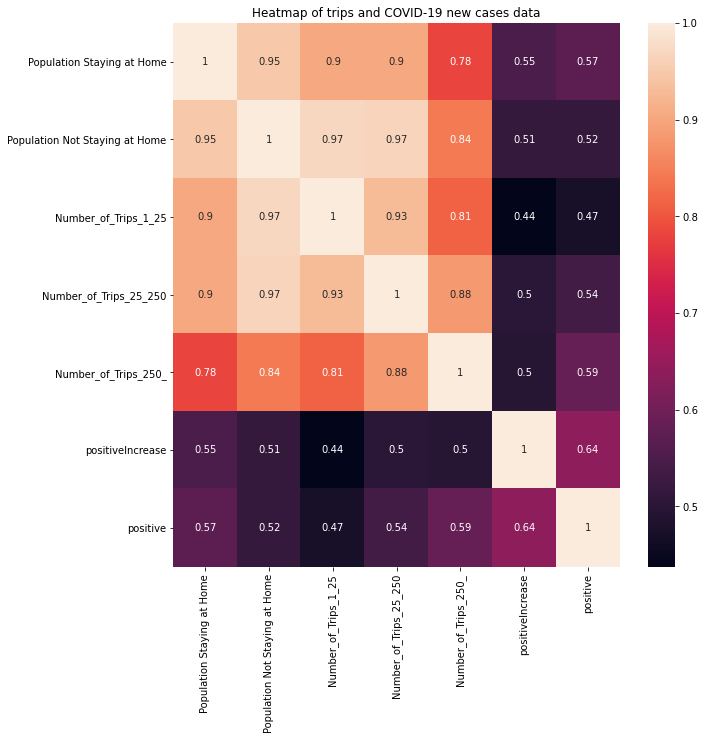

In [15]:
#Shows the correlation
plt.subplots(figsize=(10, 10))
plt.title("Heatmap of trips and COVID-19 new cases data")
heatmap = sns.heatmap(df_combined_heatmap.corr(), annot=True)

For each state, we will drop any row that does not have a positive increase > 0. This makes no mathematical sense as a state cannot have negative cases of positive cases of COVID-19. We believe that these were data entry errors, so we'll omit them for our analysis.

In [16]:
df_combined[df_combined['positiveIncrease'] < 0]

,index,Date,State,Population Staying at Home,Population Not Staying at Home,nTrips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,...,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Number_of_Trips_1_25,Number_of_Trips_25_250,Number_of_Trips_250_,positive,positiveIncrease,region,Ratio
5330,1580794,2020-05-05,MT,299169.0,763136.0,3270901.0,942011.0,878518.0,375246.0,414189.0,...,31577.0,4543.0,2956.0,2609964.0,114241.0,7499.0,456.0,-1.0,W,0.718377
5825,1603290,2020-05-15,HI,384810.0,1035681.0,3631728.0,1158429.0,980166.0,406933.0,466745.0,...,2059.0,770.0,1536.0,3012273.0,11638.0,2306.0,637.0,-1.0,W,0.729101
6233,1625699,2020-05-23,HI,328401.0,1092090.0,3892433.0,1147837.0,1097663.0,458473.0,538047.0,...,4843.0,2585.0,1856.0,3242020.0,23655.0,4441.0,642.0,-5.0,W,0.768812
6432,1647899,2020-05-27,CT,796770.0,2775895.0,12693621.0,3370642.0,3231170.0,1516759.0,1813938.0,...,44302.0,12586.0,13454.0,9932509.0,244193.0,26040.0,41288.0,-15.0,N,0.776982
6965,1670433,2020-06-06,MT,280757.0,781548.0,2872045.0,768140.0,777777.0,327424.0,366157.0,...,41590.0,8208.0,3900.0,2239498.0,138927.0,12108.0,540.0,-1.0,W,0.735710
7542,1715012,2020-06-17,VT,134844.0,491455.0,2629558.0,619637.0,691093.0,337313.0,379879.0,...,10854.0,1580.0,1078.0,2027922.0,50397.0,2658.0,1130.0,-1.0,N,0.784697
7617,1715087,2020-06-19,LA,849318.0,3810660.0,16512982.0,4126671.0,4067245.0,2062082.0,2648260.0,...,159947.0,27099.0,7958.0,12904258.0,525427.0,35057.0,48515.0,-119.0,S,0.817742
9159,1826634,2020-07-19,NJ,2658546.0,6249974.0,24320193.0,7015985.0,6144137.0,2757541.0,3268146.0,...,180580.0,37769.0,18265.0,19185809.0,748185.0,56034.0,176783.0,-31.0,N,0.701573
9442,1826917,2020-07-25,DE,243739.0,723432.0,2768748.0,693641.0,663280.0,345560.0,440838.0,...,20011.0,1404.0,1033.0,2143319.0,84577.0,2437.0,14175.0,-27.0,N,0.747988
10301,1893779,2020-08-10,WY,134927.0,442810.0,2013099.0,501627.0,557454.0,254433.0,204098.0,...,53801.0,5966.0,2012.0,1517612.0,155227.0,7978.0,3042.0,-8.0,W,0.766456


In [17]:
#drop non positive values
df_combined = df_combined[(df_combined["positiveIncrease"] >= 0)]

In [18]:
df_combined[df_combined['positiveIncrease'] < 0]

,index,Date,State,Population Staying at Home,Population Not Staying at Home,nTrips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,...,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Number_of_Trips_1_25,Number_of_Trips_25_250,Number_of_Trips_250_,positive,positiveIncrease,region,Ratio


Let's take a look an intial look at a national level of new COVID19 cases per day.

We will distinguish colors by regions for easy inference. Code inspired by https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib. Color inspired by https://in.pinterest.com/pin/773141461014013480/?d=t&mt=signup

In [19]:
colors = {'W':'#028174', 'N':'#0AB68B', 'S':'#92DE8B', 'M':'#FFE3B3'}

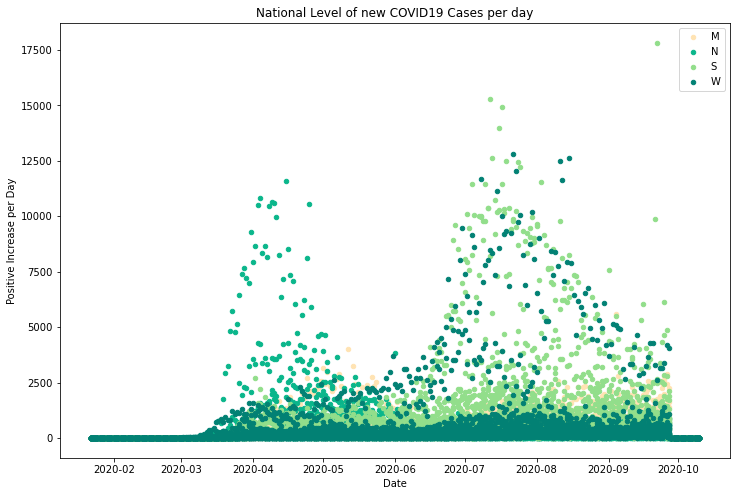

In [20]:
fig, ax = plt.subplots(figsize = (12, 8))

grouped = df_combined.groupby('region')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Date', y='positiveIncrease', label=key, color=colors[key], marker='o')

plt.xlabel('Date')
plt.ylabel('Positive Increase per Day')
ax.set_title('National Level of new COVID19 Cases per day')
plt.show()

In previous steps, we classified states into 4 groups: M, N, S, W--which stand for the Midwestern, Northern, Southern, and Western states of USA.

Immediately we can notice there are (unfortunately) three peaks, one early in the North region and then later in the South and West regions, and lastly what looks like all four regions. The North region also has one extremely negative outlier while South region has several positive outliers.

Below is a plotly interactive visualization of the daily COVID-19 cases in each state. Please don't forget to download and run this notebook to view it properly.

In [21]:
### colorscale
scl = [
    [0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

### create empty list for data object
data_slider = []

#populate the data object

for date in df_COVID19_state_wrangled.date.unique():


    #select the data
    df_positive_case = df_COVID19_state_wrangled[(df_COVID19_state_wrangled['date'] == date)]

    for col in df_positive_case.columns:  # I transform the columns into string type so I can:
        df_positive_case[col] = df_positive_case[col].astype(str)

    ###create the text for mouse-hover for each state, for the current day    
    df_positive_case['text'] = df_positive_case['state'] + 'Positive Increase: '+ df_positive_case['positiveIncrease']

    ### create the dictionary with the data for the current date
    data_date = dict(
                        type = 'choropleth',
                        locations = df_positive_case['state'],
                        z = df_positive_case['positiveIncrease'].astype(float),
                        locationmode = 'USA-states',
                        colorscale = scl,
                        text = df_positive_case['text'],
                        colorbar = {"title": "# of Cases"}
                        )

    data_slider.append(data_date)  # I add the dictionary to the list of dictionaries for the slider

#create the steps for the slider

steps = []

for i in range(len(data_slider)):
    step = dict(method = 'restyle', args=['visible', [False] * len(data_slider)], label='Day {}'.format(i + 1)) # label to be displayed for each step (date)
    step['args'][1][i] = True
    steps.append(step)

#create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps = steps)]


#set up the layout (including slider option)
layout = go.Layout(
    autosize = False, title = 'Number of Daily Positive COVID-19 Cases', width = 1000, height = 600,
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
    sliders=sliders,
)

#create the figure object
fig = dict(data = data_slider, layout = layout)
figure = go.FigureWidget(fig)
iplot(fig)

C:\Users\PC\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Let's next look at how the total number of trips have changed over the same time range.

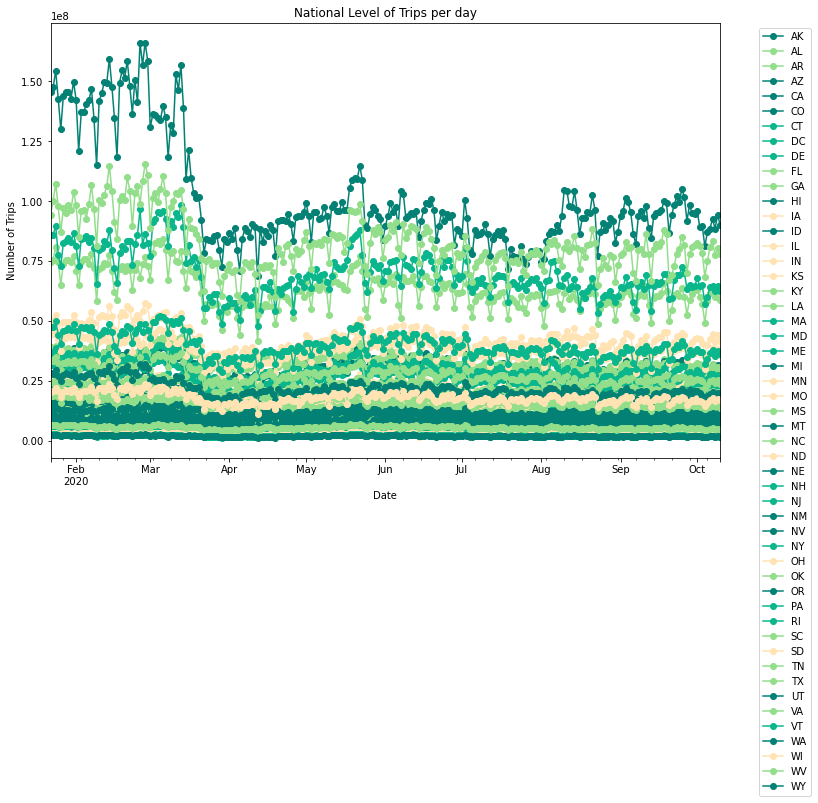

In [22]:
fig, ax = plt.subplots(figsize = (12, 8))

grouped = df_combined.groupby('State')
for key, group in grouped:
    group.plot(ax=ax, kind='line', x='Date', y='nTrips', label=key, color=colors[regions[key]], marker='o')

    
    
    
plt.xlabel('Date')
plt.ylabel('Number of Trips')
ax.set_title('National Level of Trips per day')
#Removing legend as this was sorted by all 50 states
#Color scheme stays consistent as above however
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.show()

The states in the same regional category (M, N, S, W) are sharing the same color. This is a little concerning. Aside from an initial decrease between March and April in total trips for certain states, there seems to be little to no change in total trips for the subsequent months while there were two peaks in COVID increases (ignoring the lone spike).

Again, another plotly interactive visualization of the number of daily travels in each state.

In [23]:
data_slider2 = []
#populate the data object

for travel_date in df_trips_by_distance_state.Date.unique():


    #select the data
    df_travel = df_trips_by_distance_state[(df_trips_by_distance_state['Date'] == travel_date)]

    for col in df_travel.columns:
        df_travel[col] = df_travel[col].astype(str)

    #create the text for mouse-hover for each state, for the current year    
    df_travel['text'] = df_travel['State'] + 'Number of Travels: '+ df_travel['nTrips']

    ### create the dictionary with the data for the current date
    data = dict(
                        type = 'choropleth',
                        locations = df_travel['State'],
                        z = df_travel['nTrips'].astype(float),
                        locationmode = 'USA-states',
                        colorscale = scl,
                        text = df_travel['text'],
                        colorbar = {"title": "# of Travels"}
                        )

    data_slider2.append(data)  # I add the dictionary to the list of dictionaries for the slider

    
#create the steps for the slider

steps2 = []

for i in range(len(data_slider2)):
    step = dict(method = 'restyle', args=['visible', [False] * len(data_slider2)], label='Day {}'.format(i + 1)) # label to be displayed for each step (date)
    step['args'][1][i] = True
    steps2.append(step)

#create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps = steps2)]  


#set up the layout (including slider option)
layout = go.Layout(
    autosize = False, title = 'Number of Travels', width = 1000, height = 600,
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
    sliders=sliders,
)

#create the figure object
fig2 = dict(data = data_slider2, layout = layout)


#plot in the notebook
iplot(fig2)

C:\Users\PC\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Because US states like California and Texas are relatively highly populous and hence have higher number of travels, this visualization doesn't depict the travels of other less populous states as intended. Hover over each state to see the accurate numbers increase or decrease.

Let's plot the relationship between Number of Trips and Positive Increase. If the Number of Trips doesn't change very much, but new positive cases does, then it will be hard to establish a relationship between the two.

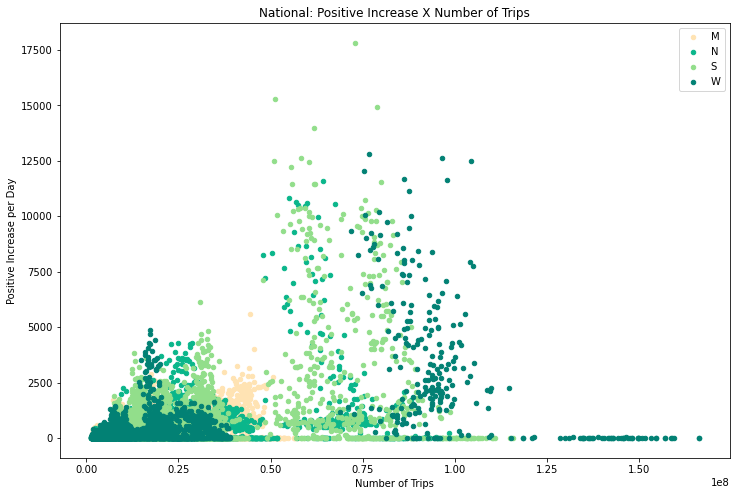

In [24]:
fig, ax = plt.subplots(figsize = (12, 8))

grouped = df_combined.groupby('region')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x="nTrips", y='positiveIncrease', label=key, color=colors[key], marker='o')

plt.xlabel('Number of Trips')
plt.ylabel('Positive Increase per Day')
ax.set_title('National: Positive Increase X Number of Trips')
plt.show()

There seems to be some positive correlation, however there are clear differences depending even within regions. There is also the issue that at the far right of the graph where there are a lot of trips with zero new positive COVID cases. This is explained by how we see a large number of trips in the West early in the year, while the COVID cases only increased in the later half of the year. Another explanation for all the variability is due to the fact that not all states have an equal distribution in population and average trips, with more populous states (i.e. California) skewing the data. To avoid regional and national bias, we will now analyze everything at a state level.

As seen in the graph, there is extremely varying data regarding the relationship each state has with new COVID cases. Some of this is due to how most states only started to get COVID increases several months after we started tracking.

In [25]:
#Get state level correlation between positiveIncrease and Number of Trips, including distance

for state in state_list:
    exec(f'df_combined_corr_ntrip_{state} = df_combined_{state}["nTrips"].corr(df_combined_{state}["positiveIncrease"])')
    exec(f'df_combined_corr_1_25_{state} = df_combined_{state}["Number_of_Trips_1_25"].corr(df_combined_{state}["positiveIncrease"])')
    exec(f'df_combined_corr_25_250_{state} = df_combined_{state}["Number_of_Trips_25_250"].corr(df_combined_{state}["positiveIncrease"])')
    exec(f'df_combined_corr_250_{state} = df_combined_{state}["Number_of_Trips_250_"].corr(df_combined_{state}["positiveIncrease"])')
    
#create correlation lists
state_corr_ntrip = []
state_corr_1_25 = []
state_corr_25_250 = []
state_corr_250 = []

#collect state correlations into lists
state_corr_ntrip.extend(value for name, value in locals().items() if name.startswith("df_combined_corr_ntrip_"))
state_corr_1_25.extend(value for name, value in locals().items() if name.startswith("df_combined_corr_1_25_"))
state_corr_25_250.extend(value for name, value in locals().items() if name.startswith("df_combined_corr_25_250_"))
state_corr_250.extend(value for name, value in locals().items() if name.startswith("df_combined_corr_250_"))

#create correlation dataframes
df_corr_ntrip = pd.DataFrame(state_corr_ntrip, index = state_list, columns = ["Number of Trips"])
df_corr_1_25 = pd.DataFrame(state_corr_1_25, index = state_list, columns = ["Number of Trips (1-25)"])
df_corr_25_250 = pd.DataFrame(state_corr_25_250, index = state_list, columns = ["Number of Trips (25-250)"])
df_corr_250 = pd.DataFrame(state_corr_250, index = state_list, columns = ["Number of Trips (250+)"])

#merge dataframes
df_corr = pd.concat([df_corr_ntrip, df_corr_1_25], axis = 1)
df_corr = pd.concat([df_corr, df_corr_25_250], axis = 1)
df_corr = pd.concat([df_corr, df_corr_250], axis = 1)

In [26]:
df_corr

,Number of Trips,Number of Trips (1-25),Number of Trips (25-250),Number of Trips (250+)
AL,-0.360377,-0.426324,0.155837,0.275510
AK,-0.455003,-0.490661,0.366043,0.328184
AZ,-0.384762,-0.407092,0.091454,0.145421
AR,-0.189026,-0.257154,0.347377,0.256339
CA,-0.522484,-0.555735,0.133078,0.225204
CO,-0.518621,-0.517225,-0.065125,-0.020546
CT,-0.218259,-0.135210,-0.605032,-0.169249
DC,-0.305811,-0.275223,-0.397344,-0.176218
DE,-0.173245,-0.109212,-0.308956,-0.212701
FL,-0.331047,-0.380926,0.262362,0.240644


In [27]:
print("Ratio of Pos / Neg correlation in total number of trips: ", (df_corr['Number of Trips'] > 0).sum(), " / ", (df_corr['Number of Trips'] < 0).sum())
print("Ratio of Pos / Neg correlation in trips between 1-25 miles: ", (df_corr['Number of Trips (1-25)'] > 0).sum(), " / ", (df_corr['Number of Trips (1-25)'] < 0).sum())
print("Ratio of Pos / Neg correlation in trips between 25-250 miles: ", (df_corr['Number of Trips (25-250)'] > 0).sum(), " / ", (df_corr['Number of Trips (25-250)'] < 0).sum())
print("Ratio of Pos / Neg correlation in trips above 250 miles: ", (df_corr['Number of Trips (250+)'] > 0).sum(), " / ", (df_corr['Number of Trips (250+)'] < 0).sum())

Ratio of Pos / Neg correlation in total number of trips:  1  /  50
Ratio of Pos / Neg correlation in trips between 1-25 miles:  2  /  49
Ratio of Pos / Neg correlation in trips between 25-250 miles:  33  /  18
Ratio of Pos / Neg correlation in trips above 250 miles:  35  /  16


Interestingly, many states have an overall negative correlation with total trips, but at a distance of 25-250 miles the majority of states have a positive correlation for trips, with some of the positive correlation lingering in longer trips.

# Data Analysis and Results

One of the challenges for our hypothesis is that each state exhibits different seasonality in COVID-19 cases, which is expected considering the North East was an early hotspot for the virus. This means that we will have to analyze everything at a state level and compare accuracy scores at an aggregate level.

### Positive Increase as a Function of Trips sorted into Thresholds (Distance of trips)
Total trips cannot be included as a predictor since it has perfect collinearity with the other categorical variables

In [28]:
#Create arrays for storing results
params = []
pvals = []
rsquared = []


#Repeat for every state
for state in state_list:
    #Create OLS model and fit
    exec(f'outcome1_{state}, predictors1_{state} = patsy.dmatrices("positiveIncrease ~ Number_of_Trips_1_25 + Number_of_Trips_25_250 + Number_of_Trips_250_", df_combined_{state})')
    exec(f'mod1_{state} = sm.OLS(outcome1_{state}, predictors1_{state})')
    exec(f'res1_{state} = mod1_{state}.fit()')
    
    #Store params
    exec(f'params.append(res1_{state}.params)')
    exec(f'pvals.append(res1_{state}.pvalues)')
    exec(f'rsquared.append(res1_{state}.rsquared)')

#Create results dataframes
res1_params = pd.DataFrame(params, index = state_list, columns = ['Intercept','1-25','25-250','250+'])
res1_pvals = pd.DataFrame(pvals, index = state_list, columns = ['pIntercept','p(1-25)','p(25-250)','p(250+)'])
res1_rsquareds = pd.DataFrame(rsquared, index = state_list, columns = ['rSquared'])

#Merge results
df_res1 = pd.concat([res1_params, res1_pvals, res1_rsquareds],axis=1)
df_res1

,Intercept,1-25,25-250,250+,pIntercept,p(1-25),p(25-250),p(250+),rSquared
AL,2215.363143,-0.000263,0.002501,0.002672,7.027147e-12,1.914603e-16,1.780201e-04,4.743904e-01,0.289774
AK,86.753468,-0.000067,0.000902,0.002262,3.450568e-07,5.292162e-18,1.170982e-04,1.319544e-05,0.380804
AZ,2408.175112,-0.000199,0.001904,0.005397,1.858463e-05,1.598685e-13,8.409203e-02,9.611261e-02,0.207119
AR,459.316353,-0.000192,0.003855,-0.000864,1.548334e-02,5.059639e-12,1.060214e-10,7.932670e-01,0.270753
CA,4673.264120,-0.000118,0.002107,0.003688,7.244794e-06,5.993251e-34,1.010156e-06,1.443534e-02,0.463574
CO,1000.852759,-0.000052,0.000241,-0.000750,1.132133e-22,1.438388e-19,1.250501e-01,1.365346e-01,0.275219
CT,1238.645344,-0.000016,-0.003751,0.002228,3.017014e-15,3.146171e-01,2.104693e-25,3.776884e-02,0.384280
DC,247.521363,-0.000039,-0.005323,-0.000641,1.558162e-23,7.959329e-07,1.857887e-08,2.810246e-01,0.233749
DE,260.416440,-0.000034,-0.001120,-0.004843,1.600608e-08,5.789047e-02,1.190632e-03,8.421670e-02,0.112054
FL,8377.094575,-0.000324,0.008887,-0.006146,2.909320e-07,1.581982e-19,6.870853e-12,6.036705e-02,0.327880


In [29]:
print('Average Accuracy: ', df_res1['rSquared'].mean())
print('Best Accuracy: ', df_res1['rSquared'].max())
print('Worst Accuracy: ', df_res1['rSquared'].min())

Average Accuracy:  0.27318447469125234
Best Accuracy:  0.5935510167458291
Worst Accuracy:  0.07265548637166253


As seen above, the majority of the models fail to capture any meaningful relationship, and the ones with moderate accuracy (i.e. WV) have extremely low coefficients on the predictors. 

### Positive Increase as a function of Ratio not Staying Home and Total Trips
Since trips threshold doesn't make a difference, we will consolidate them into one variable. We will also introduce the ratio variable which calulates the proportion of a state's population that are not staying home.

In [30]:
#Reset arrays for storing results
params = []
pvals = []
rsquared = []


#Repeat for every state
for state in state_list:    
    #Create OLS model and fit
    exec(f'outcome2_{state}, predictors2_{state} = patsy.dmatrices("positiveIncrease ~ nTrips + Ratio", df_combined_{state})')
    exec(f'mod2_{state} = sm.OLS(outcome2_{state}, predictors2_{state})')
    exec(f'res2_{state} = mod2_{state}.fit()')
    
    #Store params
    exec(f'params.append(res2_{state}.params)')
    exec(f'pvals.append(res2_{state}.pvalues)')
    exec(f'rsquared.append(res2_{state}.rsquared)')

#Create results dataframes
res2_params = pd.DataFrame(params, index = state_list, columns = ['Intercept','nTrips','Ratio'])
res2_pvals = pd.DataFrame(pvals, index = state_list, columns = ['pIntercept','pnTrips','pRatio'])
res2_rsquareds = pd.DataFrame(rsquared, index = state_list, columns = ['rSquared'])

#Merge results
df_res2 = pd.concat([res2_params, res2_pvals, res2_rsquareds],axis=1)
df_res2

,Intercept,nTrips,Ratio,pIntercept,pnTrips,pRatio,rSquared
AL,-6206.067396,-3.158443e-04,14061.186036,5.829372e-05,6.360590e-16,1.091200e-08,0.232804
AK,-262.430155,-1.225040e-04,767.911594,5.380591e-03,1.201151e-13,8.867670e-06,0.265114
AZ,-8261.986293,-3.772425e-04,22091.509918,3.121746e-04,3.246408e-13,2.604935e-07,0.230814
AR,-4021.044941,-2.201022e-04,7821.260117,6.887668e-04,2.018852e-07,2.484586e-05,0.099573
CA,-23184.640618,-1.756746e-04,59814.593279,4.017422e-05,4.314918e-19,3.555869e-09,0.364358
CO,899.932812,-4.322389e-05,300.304298,8.226369e-03,3.808993e-06,6.524281e-01,0.269539
CT,4329.584447,8.111408e-05,-6655.105286,2.367820e-10,3.955322e-03,8.080790e-08,0.147633
DC,536.771378,2.156722e-05,-821.025552,1.029628e-16,6.526454e-02,2.819016e-10,0.222397
DE,891.706468,4.096621e-05,-1230.332990,2.766965e-08,5.724698e-02,5.493257e-06,0.104234
FL,-17560.751303,-3.651776e-04,55524.973369,1.338690e-02,5.030601e-10,2.410725e-05,0.168728


In [31]:
print('Average Accuracy: ', df_res2['rSquared'].mean())
print('Best Accuracy: ', df_res2['rSquared'].max())
print('Worst Accuracy: ', df_res2['rSquared'].min())

Average Accuracy:  0.17041627095376163
Best Accuracy:  0.36435789488902015
Worst Accuracy:  0.02352801072313948


This model performed only marginally better than the previous one. The coefficients on number of trips are still close to zero. What is surprising however is that ratio of people not staying home has a negative effect on positive increases in cases.

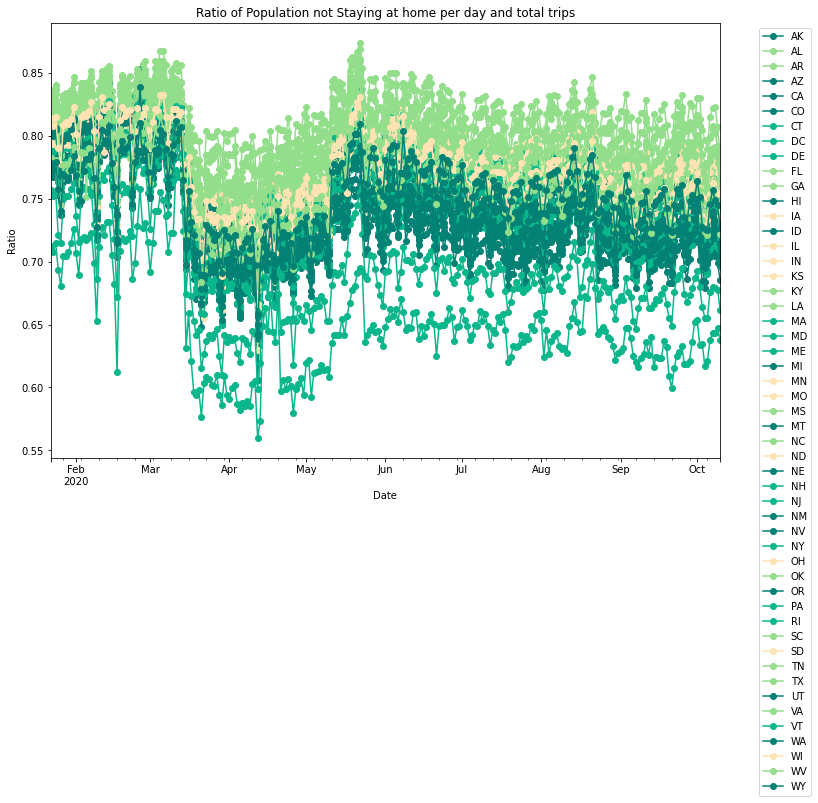

In [32]:
fig, ax = plt.subplots(figsize = (12, 8))


grouped = df_combined.groupby('State')
for key, group in grouped:
    group.plot(ax=ax, kind='line', x='Date', y='Ratio', label=key, color=colors[regions[key]], marker='o')

plt.xlabel('Date')
plt.ylabel('Ratio')
ax.set_title('Ratio of Population not Staying at home per day and total trips')
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))

plt.show()

The states in the same regional category (M, N, S, W) are sharing the same color. There is a general negative decrease in ratio not staying at home while positive cases are increasing which could explain why the coefficient is negative. Regardless, this model is also unsatisfactory in establish a correlation.

In [33]:
data_slider3 = []
#populate the data object

for travel_date in df_trips_by_distance_state.Date.unique():


    #select the data
    df_travel = df_trips_by_distance_state[(df_trips_by_distance_state['Date'] == travel_date)]

    for col in df_travel.columns:
        df_travel[col] = df_travel[col].astype(str)

    #create the text for mouse-hover for each state, for the current year    
    df_travel['text'] = df_travel['State'] + 'Number of Population Not Staying at Home: '+ df_travel['Population Not Staying at Home']

    ### create the dictionary with the data for the current date
    data = dict(
                        type = 'choropleth',
                        locations = df_travel['State'],
                        z = df_travel['Population Not Staying at Home'].astype(float),
                        locationmode = 'USA-states',
                        colorscale = scl,
                        text = df_travel['text'],
                        colorbar = {"title": "# of Population"}
                        )

    data_slider3.append(data)  #add the dictionary to the list of dictionaries for the slider

    
#create the steps for the slider

steps3 = []

for i in range(len(data_slider3)):
    step = dict(method = 'restyle', args=['visible', [False] * len(data_slider3)], label='Day {}'.format(i + 1)) # label to be displayed for each step (date)
    step['args'][1][i] = True
    steps3.append(step)

#create the 'sliders' object from the 'steps' 

sliders = [dict(active=0, pad={"t": 1}, steps = steps3)]  


#set up the layout (including slider option)
layout = go.Layout(
    autosize = False, title = 'Number of Population Not Staying at Home', width = 1000, height = 600,
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
    sliders=sliders,
)

#create the figure object
fig3 = dict(data = data_slider3, layout = layout)


#plot in the notebook
iplot(fig3)

C:\Users\PC\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Again, the relatively highly populous states make the less populous states' data look static. Hover over each state to see the accurate numbers increase or decrease.

### Positive Increase as a Time Series Analysis with number of trips (nTrips) and Ratio not Staying Home
Since the data has a heavy reliance on time, we will consider it like a stock price analysis, where today's gains are have some dependence on yesterday's gains. 

In [34]:
#Reset arrays for storing results
params = []
pvals = []
rsquared = []


#Repeat for every state
for state in state_list:
    #Copy new dataframe for time series analysis
    exec(f'ts_{state} = df_combined_{state}[["Date","positiveIncrease","State","Ratio","nTrips"]].copy()')
    
    #Add yesterdays positiveIncreases as a predictor
    exec(f'ts_{state}["Yesterday"]=ts_{state}["positiveIncrease"].shift(1)')
    
    #Create OLS model
    exec(f'outcome3_{state}, predictors3_{state} = patsy.dmatrices("positiveIncrease ~ nTrips + Ratio + Yesterday", ts_{state})')
    exec(f'mod3_{state} = sm.OLS(outcome3_{state}, predictors3_{state})')
    exec(f'res3_{state} = mod3_{state}.fit()')
    
    #Store params
    exec(f'params.append(res3_{state}.params)')
    exec(f'pvals.append(res3_{state}.pvalues)')
    exec(f'rsquared.append(res3_{state}.rsquared)')

#Create results dataframes
res3_params = pd.DataFrame(params, index = state_list, columns = ['Intercept','nTrips','Ratio','Yesterday'])
res3_pvals = pd.DataFrame(pvals, index = state_list, columns = ['pIntercept','pnTrips','pRatio','pYesterday'])
res3_rsquareds = pd.DataFrame(rsquared, index = state_list, columns = ['rSquared'])

#Merge results
df_res3 = pd.concat([res3_params, res3_pvals, res3_rsquareds],axis=1)
df_res3

,Intercept,nTrips,Ratio,Yesterday,pIntercept,pnTrips,pRatio,pYesterday,rSquared
AL,-1828.793051,-8.272529e-05,3946.861987,0.721172,0.097404,0.005189,0.027606,6.542173e-42,0.624130
AK,-145.284945,-6.152573e-05,403.839463,0.509201,0.077010,0.000059,0.008228,2.374574e-18,0.453371
AZ,-2493.707133,-7.191595e-05,5417.446835,0.838287,0.051590,0.017085,0.025581,1.213139e-68,0.765637
AR,-2106.900148,-1.163155e-04,4109.549565,0.477105,0.046944,0.002582,0.014065,3.228960e-16,0.305611
CA,-2941.180732,-1.997463e-05,7209.614404,0.887676,0.272443,0.044483,0.140804,8.375765e-88,0.862140
CO,482.254774,-9.400432e-06,-282.747695,0.669200,0.059416,0.196149,0.572437,1.063607e-34,0.591320
CT,2700.494901,4.560703e-05,-4073.888026,0.367193,0.000064,0.088236,0.000763,9.539370e-10,0.261930
DC,170.098944,7.763403e-06,-264.855262,0.694795,0.000659,0.357921,0.006590,3.100522e-39,0.599579
DE,584.657620,2.611916e-05,-802.751876,0.336354,0.000227,0.203822,0.002356,2.779755e-08,0.204191
FL,81.960767,1.312187e-05,-1022.019427,0.957937,0.973529,0.538590,0.825750,1.136042e-121,0.901640


In [35]:
print('Average Accuracy: ', df_res3['rSquared'].mean())
print('Best Accuracy: ', df_res3['rSquared'].max())
print('Worst Accuracy: ', df_res3['rSquared'].min())

Average Accuracy:  0.6374506960622269
Best Accuracy:  0.9327888524308207
Worst Accuracy:  0.09507175213166963


This model works really well in some states, and terribly in others. Lets see whether this can be a function of region given that it looked like region had an effect on Ratio earlier.

Below is the State of California's OLS regression result

In [36]:
print(res3_CA.summary())

                            OLS Regression Results                            
Dep. Variable:       positiveIncrease   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     537.8
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          1.16e-110
Time:                        23:28:19   Log-Likelihood:                -2224.0
No. Observations:                 262   AIC:                             4456.
Df Residuals:                     258   BIC:                             4470.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2941.1807   2674.277     -1.100      0.2

In [37]:
#Add region column
df_res3['region'] = df_res3.index.map(regions)

print('West')
print('Average Accuracy: ', df_res3[df_res3['region'] == 'W']['rSquared'].mean())
print('Best Accuracy: ', df_res3[df_res3['region'] == 'W']['rSquared'].max())
print('Worst Accuracy: ', df_res3[df_res3['region'] == 'W']['rSquared'].min())

print('Midwest')
print('Average Accuracy: ', df_res3[df_res3['region'] == 'M']['rSquared'].mean())
print('Best Accuracy: ', df_res3[df_res3['region'] == 'M']['rSquared'].max())
print('Worst Accuracy: ', df_res3[df_res3['region'] == 'M']['rSquared'].min())

print('South')
print('Average Accuracy: ', df_res3[df_res3['region'] == 'S']['rSquared'].mean())
print('Best Accuracy: ', df_res3[df_res3['region'] == 'S']['rSquared'].max())
print('Worst Accuracy: ', df_res3[df_res3['region'] == 'S']['rSquared'].min())

print('North')
print('Average Accuracy: ', df_res3[df_res3['region'] == 'N']['rSquared'].mean())
print('Best Accuracy: ', df_res3[df_res3['region'] == 'N']['rSquared'].max())
print('Worst Accuracy: ', df_res3[df_res3['region'] == 'N']['rSquared'].min())

West
Average Accuracy:  0.6667790980223166
Best Accuracy:  0.8632320100125113
Worst Accuracy:  0.34008848425840366
Midwest
Average Accuracy:  0.6981314329625259
Best Accuracy:  0.8806608778503784
Worst Accuracy:  0.09507175213166963
South
Average Accuracy:  0.6313479044239492
Best Accuracy:  0.9016402817300644
Worst Accuracy:  0.30561148070438615
North
Average Accuracy:  0.5573428364398568
Best Accuracy:  0.9327888524308207
Worst Accuracy:  0.16375769985471778


It doesn't look like region has anything to do with accuracy of the model. However, the average high accuracies combined with the small p-values for Yesterday's gains shows that this model captures a lot of the variance for most states.

# Ethics & Privacy
The datasets we are using have been stripped of personal identifiers and has been publicly shared by the COVID 19 Project and NY Times so privacy concerns did not apply. With that being said, we are cognizant of our data including deaths and ventilator usage, and while not the direct topic of our research we will keep these implications in the forefront of our minds. Our intentions with this question is to identify how interstate travel is correlated with COVID cases to provide policymakers with more information to better inform their decision making, and not put blame on those who travel interstate. The data we found is generated by volunteers collecting publicly shared information by county, hospital, and state and then compiling it into a central database. We expect the data to be generally unbiased as the data collected is nondiscriminatory, however it may be underrepresentative of 'true' figures due to lack of self reporting by individuals, delays in the updating of records, and lack of official government support.

We also understand that interstate travel is the primary source of income for many individuals (i.e. delivery truck drivers) and do not intend to presume that they should be held responsible for the amount of COVID cases found as a result of our research. Additionally, if our research does lead to interstate travel restrictions, we hope that those whose incomes are reliant upon interstate travel are properly supported and that no blame should be placed onto them.

Again, our goal is to help inform future policy changes and raise awareness regarding transmission rates by travel, rather than place fault upon any individual.



# Conclusion & Discussion

The general understanding of how COVID-19 is spread indicates that direct, indirect, and/or close interaction with those who have COVID-19 are the most common forms. Our study concludes that the association between the number of trips and the number of individuals who tested positive for COVID-19 more than likely boiled down to a number of confounding variables that we did not or could not fully investigate. Although we may have found certain correlations between the number of trips and the number of individuals with a positive result for COVID-19, all of these correlations were rather weak when we further analyzed and investigated the data.

Due to the high variability of populations between states, we found that comparing the number of trips between all states resulted in exaggerated numbers of trips for states with higher populations. Therefore, in order to mediate and further analyze the data, we decided to instead investigate the relationship between the population of the state and the number of COVID-19 cases. By doing this we found that the number of people who tested positive for COVID-19 significantly correlated with the population of the state. Therefore, we ultimately decided to examine our data on a state level inorder to avoid any regional and national biases.

For our study we used models such as linear regression to perform various means of data analysis. Within our data analysis the number of trips and the novel cases of COVID-19 were heavily scrutinized. Although, we soon realized that most of our data, specifically between the months of March and April, were more than likely biased as around that time of the year COVID-19 testing was not done appropriately. While we safely assumed that the trips data from the Bureau of Transportation Statistics accurately reproduced the actual travel data, we understood that the daily COVID-19 cases data likely weren’t as accurate due to limited testing availability and various state/local mandates. We believe that this data discrepancy was one of the variables that led to our result to be inconclusive.

Overall, our models predict that there is no direct correlation between the spread of COVID-19 and the number of trips within a state. However, we found that the data we collected is heavily reliant on time. Therefore, after considering yesterday's positive increases, we found that the model gained in accuracy but the significance of total number of trips remains close to zero. This implies that the number of trips has no effect on new positive cases. While we couldn't explicitly test for it, we would make a new hypothesis that travelling with social distancing measures (i.e. facemasks) has no effect on new cases, and may help with future policy guidelines. In the future, as more data begins to arise, we hope to build a model that provides meaningful insights. Additionally, we realized that the ever increasing threat of COVID-19 poses an excessive danger to the international community. Thus, we found that there have been multiple studies conducted to help search for and discover ways in which outbreaks of the virus can be prevented [1]. We believe that that should serve as a foundation of hope for the eventual eradication of COVID-19.


[1] Frisan, T. (2020). Faculty Opinions recommendation of Substantial undocumented infection facilitates the rapid dissemination of novel coronavirus (SARS-CoV2). Faculty Opinions – Post-Publication Peer Review of the Biomedical Literature. doi:10.3410/f.737557783.793572927.

# Team Contributions

#### Taylor
- Data Description
- Data Cleaning
- Data Visualization & EDA 

#### Luis
- Data Description
- Ethics & Privacy
- Conclusion & Discussion

#### Seoyoung
- Background and Prior Work
- Data Description
- Conclusion & Discussion

#### Mitchell
- Research Question
- Data Visualization & EDA
- Linear Regression models
